In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('open_pubs.csv')

In [3]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.97934,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [4]:
len(df)

51331

In [5]:
df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [6]:
len(df[df['latitude'] == r'\N'])

767

In [7]:
len(df[df['longitude'] == r'\N'])

767

In [8]:
# calculate the mean longitude of valid longitude values
mean_longitude = df[df['longitude'] != r'\N']['longitude'].astype(float).mean()

# replace missing or invalid values with the mean longitude
df['longitude'] = df['longitude'].replace(r'\N', mean_longitude)


In [9]:
# calculate the mean longitude of valid longitude values
mean_latitude = df[df['latitude'] != r'\N']['latitude'].astype(float).mean()

# replace missing or invalid values with the mean longitude
df['latitude'] = df['latitude'].replace(r'\N', mean_longitude)


In [10]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.97934,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,-1.618266,-1.618266,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,-1.618266,-1.618266,Babergh


In [11]:
df.dtypes

fsa_id              int64
name               object
address            object
postcode           object
easting             int64
northing            int64
latitude           object
longitude          object
local_authority    object
dtype: object

In [12]:
df['latitude'] = df['latitude'].astype(float)

df['longitude'] = df['longitude'].astype(float)

In [13]:
df.dtypes

fsa_id               int64
name                object
address             object
postcode            object
easting              int64
northing             int64
latitude           float64
longitude          float64
local_authority     object
dtype: object

In [14]:
# Create a new list to store the updated addresses
new_address_list = []

# Iterate over each value in the address column
for address in df['address']:
    # Split the address into a list of values
    address_list = address.split(',')
    # Check if the length of the list is 4 or 5
    if len(address_list) == 4:
        # Remove the first value from the list
        address_list = address_list[1:]
    elif len(address_list) == 5:
        # Remove the first 2 values from the list
        address_list = address_list[2:]
    # Join the remaining values with a comma as the delimiter
    new_address = ', '.join(address_list)
    # Append the new address to the new list
    new_address_list.append(new_address)

# Add the new list as a new column to the dataframe
df['new_address'] = new_address_list

# Display the updated dataframe
df.head()


,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority,new_address
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh,"Upper Street, Stratford St Mary, COLCHESTER"
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh,"Cattawade Street, Brantham, MANNINGTREE"
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh,"7 Market Hill, SUDBURY, Suffolk"
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,-1.618266,-1.618266,Babergh,"Lower Street, Stratford St Mary, COLCHESTER"
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,-1.618266,-1.618266,Babergh,"Lion Road, Glemsford, SUDBURY"


In [15]:
df.drop(columns=['address'],inplace=True)

In [16]:
df = df.rename(columns={'new_address':'address'})

In [17]:
df.head()

,fsa_id,name,postcode,easting,northing,latitude,longitude,local_authority,address
0,22,Anchor Inn,CO7 6LW,604749,234404,51.970379,0.979340,Babergh,"Upper Street, Stratford St Mary, COLCHESTER"
1,36,Ark Bar Restaurant,CO11 1RH,610194,233329,51.958698,1.057832,Babergh,"Cattawade Street, Brantham, MANNINGTREE"
2,74,Black Boy,CO10 2EA,587334,241316,52.038595,0.729915,Babergh,"7 Market Hill, SUDBURY, Suffolk"
3,75,Black Horse,CO7 6JS,622675,-5527598,-1.618266,-1.618266,Babergh,"Lower Street, Stratford St Mary, COLCHESTER"
4,76,Black Lion,CO10 7RF,622675,-5527598,-1.618266,-1.618266,Babergh,"Lion Road, Glemsford, SUDBURY"


In [18]:
df['country'] = df['address'].str.split(',').str[-1].str.strip()

In [19]:
df.isnull().sum()

fsa_id             0
name               0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
address            0
country            0
dtype: int64

In [20]:
df['local_authority'].value_counts()

County Durham         686
Leeds                 611
Cornwall              564
Wiltshire             549
Kirklees              525
                     ... 
Shetland Islands       26
Orkney Islands         15
East Renfrewshire      12
Na h-Eileanan Siar     11
Isles of Scilly        10
Name: local_authority, Length: 360, dtype: int64

In [21]:
df['country'].nunique()

4788

In [22]:
df.head()

,fsa_id,name,postcode,easting,northing,latitude,longitude,local_authority,address,country
0,22,Anchor Inn,CO7 6LW,604749,234404,51.970379,0.979340,Babergh,"Upper Street, Stratford St Mary, COLCHESTER",COLCHESTER
1,36,Ark Bar Restaurant,CO11 1RH,610194,233329,51.958698,1.057832,Babergh,"Cattawade Street, Brantham, MANNINGTREE",MANNINGTREE
2,74,Black Boy,CO10 2EA,587334,241316,52.038595,0.729915,Babergh,"7 Market Hill, SUDBURY, Suffolk",Suffolk
3,75,Black Horse,CO7 6JS,622675,-5527598,-1.618266,-1.618266,Babergh,"Lower Street, Stratford St Mary, COLCHESTER",COLCHESTER
4,76,Black Lion,CO10 7RF,622675,-5527598,-1.618266,-1.618266,Babergh,"Lion Road, Glemsford, SUDBURY",SUDBURY


In [23]:
#df.to_csv('preprocessed_df.csv',index=False)

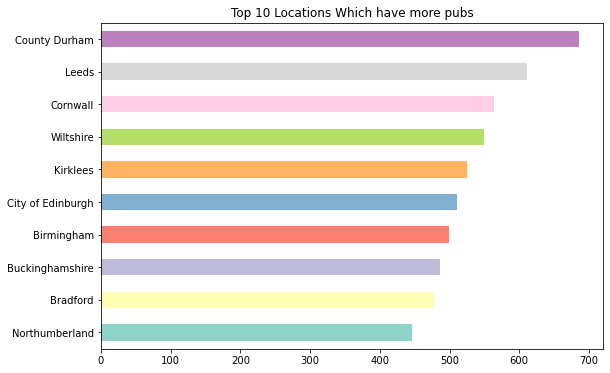

In [24]:
colors = plt.cm.Set3(range(10))
df.local_authority.value_counts().head(10).sort_values().plot(kind='barh', color=colors , figsize=(9,6), title="Top 10 Locations Which have more pubs")
plt.savefig('pubs_by_location.png', dpi=300, bbox_inches='tight')
plt.show()

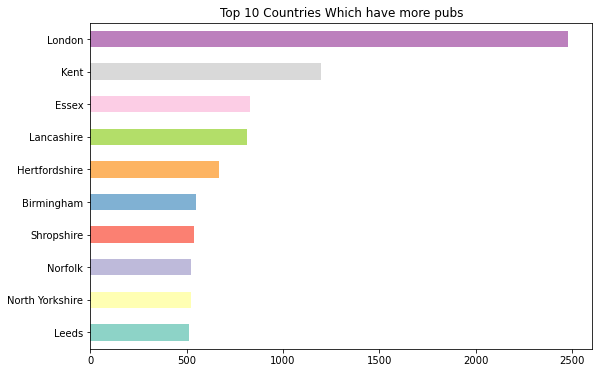

In [25]:
colors = plt.cm.Set3(range(10))
df.country.value_counts().head(10).sort_values().plot(kind='barh', color=colors , figsize=(9,6), title="Top 10 Countries Which have more pubs")
plt.savefig('pubs_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

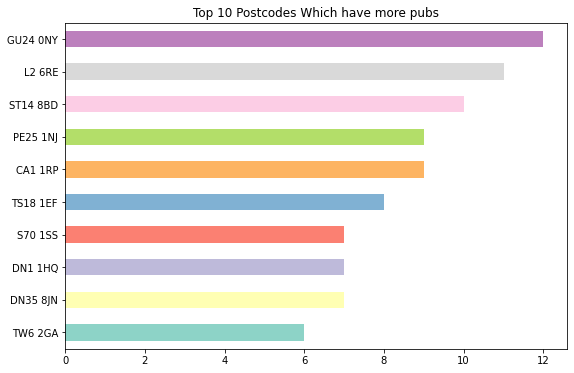

In [26]:
colors = plt.cm.Set3(range(10))
df.postcode.value_counts().head(10).sort_values().plot(kind='barh', color=colors , figsize=(9,6), title="Top 10 Postcodes Which have more pubs")
plt.show()

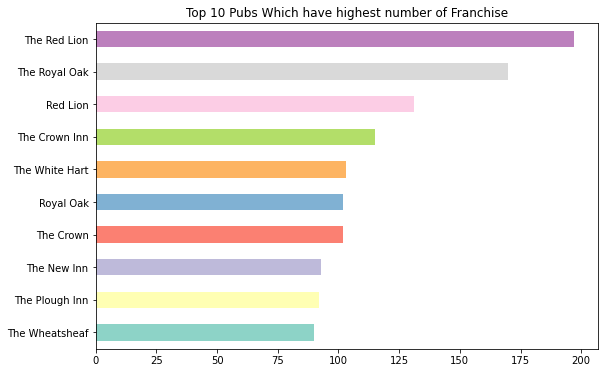

In [27]:
colors = plt.cm.Set3(range(10))
df.name.value_counts().head(10).sort_values().plot(kind='barh', color=colors , figsize=(9,6), title="Top 10 Pubs Which have highest number of Franchise")
plt.savefig('pubs_by_franchise.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
df.columns

Index(['fsa_id', 'name', 'postcode', 'easting', 'northing', 'latitude',
       'longitude', 'local_authority', 'address', 'country'],
      dtype='object')

In [29]:
# Create a map object with a starting location and zoom level

map = folium.Map(location=[51.970379, 0.979340], zoom_start=12)

# Add a marker to the map

folium.Marker(location=[51.970379, 0.979340], tooltip='Open Pub' , popup='Anchor Inn').add_to(map)

# Anchor Inn

# Display the map
map